In [39]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '..')

from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.support.support.df import simulate_df
from match.support.support.s import simulate_s

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
n = 10

In [53]:
target = simulate_s(n, index_prefix='Sample ')

target

Sample 0    0.591107
Sample 1    0.830176
Sample 2    0.342491
Sample 3    0.058536
Sample 4    0.828289
Sample 5    0.694320
Sample 6    0.706448
Sample 7    0.386156
Sample 8    0.883816
Sample 9    0.315854
Name: Simulated Series, dtype: float64

In [80]:
i0 = pd.Index(['a', 'b', 'c'])
i1 = pd.Index(['a', 'c', 'b'])
i2 = pd.Index(['a', 'c', 'b', 'd'])
i3 = pd.Index(['a', 'b', 'd'])
i4 =  pd.Index(['a', 'b'])

In [83]:
i0.symmetric_difference(i0).empty

True

In [56]:
features_continuous = simulate_df(
    n * 2, n-1, index_prefix='Feature ', column_prefix='Sample ')

features_continuous

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8
Feature 0,0.354845,0.967570,0.373534,0.948578,0.592778,0.824688,0.154573,0.467481,0.350430
Feature 1,0.813930,0.071383,0.716923,0.480743,0.225043,0.658801,0.402207,0.265398,0.943994
Feature 2,0.236956,0.572067,0.144531,0.260169,0.949489,0.934741,0.082918,0.439168,0.295110
Feature 3,0.432160,0.123900,0.766731,0.093033,0.822630,0.029118,0.885189,0.551956,0.507050
Feature 4,0.741542,0.188955,0.760576,0.682804,0.970295,0.944453,0.944164,0.082652,0.280496
Feature 5,0.083778,0.024874,0.995472,0.509871,0.327170,0.537828,0.382423,0.224189,0.501745
Feature 6,0.372742,0.480915,0.011209,0.842237,0.814372,0.407625,0.071463,0.853595,0.816239
Feature 7,0.322681,0.432789,0.654125,0.250635,0.745790,0.692208,0.650543,0.240153,0.053557
Feature 8,0.721772,0.001118,0.456894,0.188340,0.768980,0.255370,0.197856,0.258622,0.582752
Feature 9,0.473924,0.452318,0.425514,0.497306,0.613622,0.720932,0.018109,0.819136,0.565262


In [57]:
target.index.equals(features_continuous.columns)

False

Target Simulated Series (10,) and features (20, 10) have 10 shared columns.
Matching ...
Using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	With 3 bootstrapped distributions ...
Computing p-value and FDR ...
	By scoring against 3 permuted targets ...
Making annotations ...
Plotting match panel ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


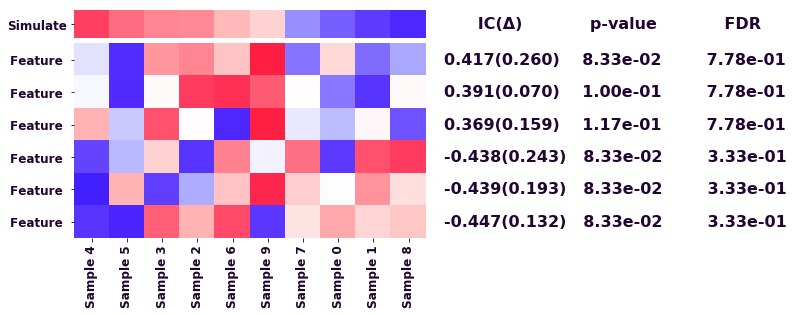

In [5]:
match_scores_for_continuous = make_match_panel(
    target,
    features_continuous,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    plot_sample_names=True)

In [6]:
target_str = pd.Series(
    ['T0'] * (n // 2) + ['T1'] * (n // 2), index=target.index)

target_str

Sample 0    T0
Sample 1    T0
Sample 2    T0
Sample 3    T0
Sample 4    T0
Sample 5    T1
Sample 6    T1
Sample 7    T1
Sample 8    T1
Sample 9    T1
dtype: object

Target None (10,) and features (20, 10) have 10 shared columns.
Clustering within group ...
Matching ...
Using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	With 3 bootstrapped distributions ...
Computing p-value and FDR ...
	By scoring against 3 permuted targets ...
Making annotations ...
Plotting match panel ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


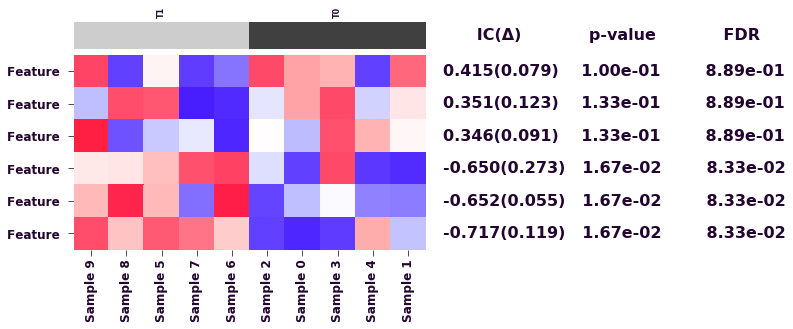

In [7]:
from matplotlib.colors import ListedColormap

match_scores_for_continuous = make_match_panel(
    target_str,
    features_continuous,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    target_type='binary',
    plot_sample_names=True)

In [8]:
features_categorical = simulate_df(
    n * 8, n, 8, index_prefix='Feature ', column_prefix='Sample ')

features_categorical

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0,4,1,1,5,1,0,2,0,6
Feature 1,2,3,4,3,7,4,3,2,7,2
Feature 2,0,0,2,0,0,0,1,7,3,4
Feature 3,7,2,6,0,2,1,1,3,4,7
Feature 4,2,1,0,4,4,1,7,5,4,6
Feature 5,6,6,7,6,2,1,2,3,1,2
Feature 6,4,4,2,3,0,1,7,7,3,7
Feature 7,6,5,0,3,1,6,7,4,2,6
Feature 8,3,2,5,0,4,0,4,3,3,7
Feature 9,0,3,3,7,1,5,6,4,7,4


Target Simulated Series (10,) and features (80, 10) have 10 shared columns.
Matching ...
Using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	With 3 bootstrapped distributions ...
Computing p-value and FDR ...
	By scoring against 3 permuted targets ...
Making annotations ...
Plotting match panel ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


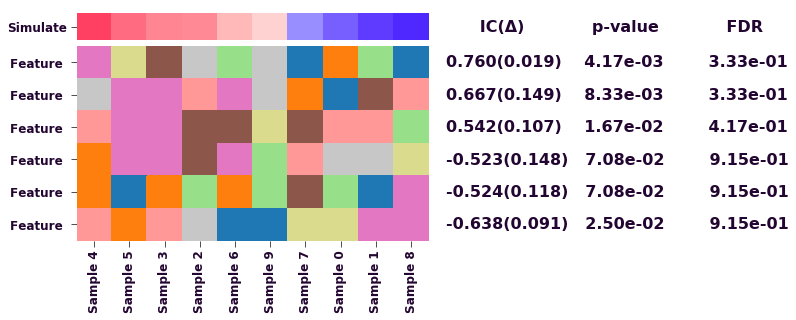

In [9]:
match_scores_for_categorical = make_match_panel(
    target,
    features_categorical,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='categorical',
    plot_sample_names=True)

In [10]:
features_binary = simulate_df(
    n * 8, n, 2, index_prefix='Feature ', column_prefix='Sample ')

features_binary

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0,0,1,1,1,1,0,0,0,0
Feature 1,0,1,0,1,1,0,1,0,1,0
Feature 2,0,0,0,0,0,0,1,1,1,0
Feature 3,1,0,0,0,0,1,1,1,0,1
Feature 4,0,1,0,0,0,1,1,1,0,0
Feature 5,0,0,1,0,0,1,0,1,1,0
Feature 6,0,0,0,1,0,1,1,1,1,1
Feature 7,0,1,0,1,1,0,1,0,0,0
Feature 8,1,0,1,0,0,0,0,1,1,1
Feature 9,0,1,1,1,1,1,0,0,1,0


Target Simulated Series (10,) and features (80, 10) have 10 shared columns.
Matching ...
Using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	With 3 bootstrapped distributions ...
Computing p-value and FDR ...
	By scoring against 3 permuted targets ...
Making annotations ...
Plotting match panel ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


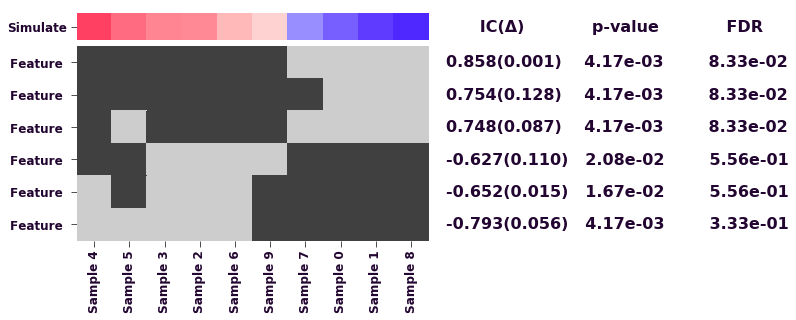

In [17]:
match_scores_for_binary = make_match_panel(
    target,
    features_binary,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='binary',
    plot_sample_names=True)

In [18]:
features = [
    [
        'Continuous features',
        features_continuous,
        False,
        'continuous',
        match_scores_for_continuous,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
    ],
    [
        'Categorical features',
        features_categorical,
        False,
        'categorical',
        match_scores_for_categorical,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
    ],
    [
        'Binary features',
        features_binary,
        False,
        'binary',
        match_scores_for_binary,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
    ],
    [
        'Cntinuous features (increasing score)',
        features_continuous.iloc[:, :-1],
        True,
        'continuous',
        match_scores_for_continuous,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
    ],
]

Indexs: ()
Target Simulated Series (10,) and features (20, 10) have 10 shared columns.
Making annotations ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Target Simulated Series (10,) and features (80, 10) have 10 shared columns.
Making annotations ...
Target Simulated Series (10,) and features (80, 10) have 10 shared columns.
Making annotations ...
Target Simulated Series (10,) and features (20, 9) have 9 shared columns.
Making annotations ...


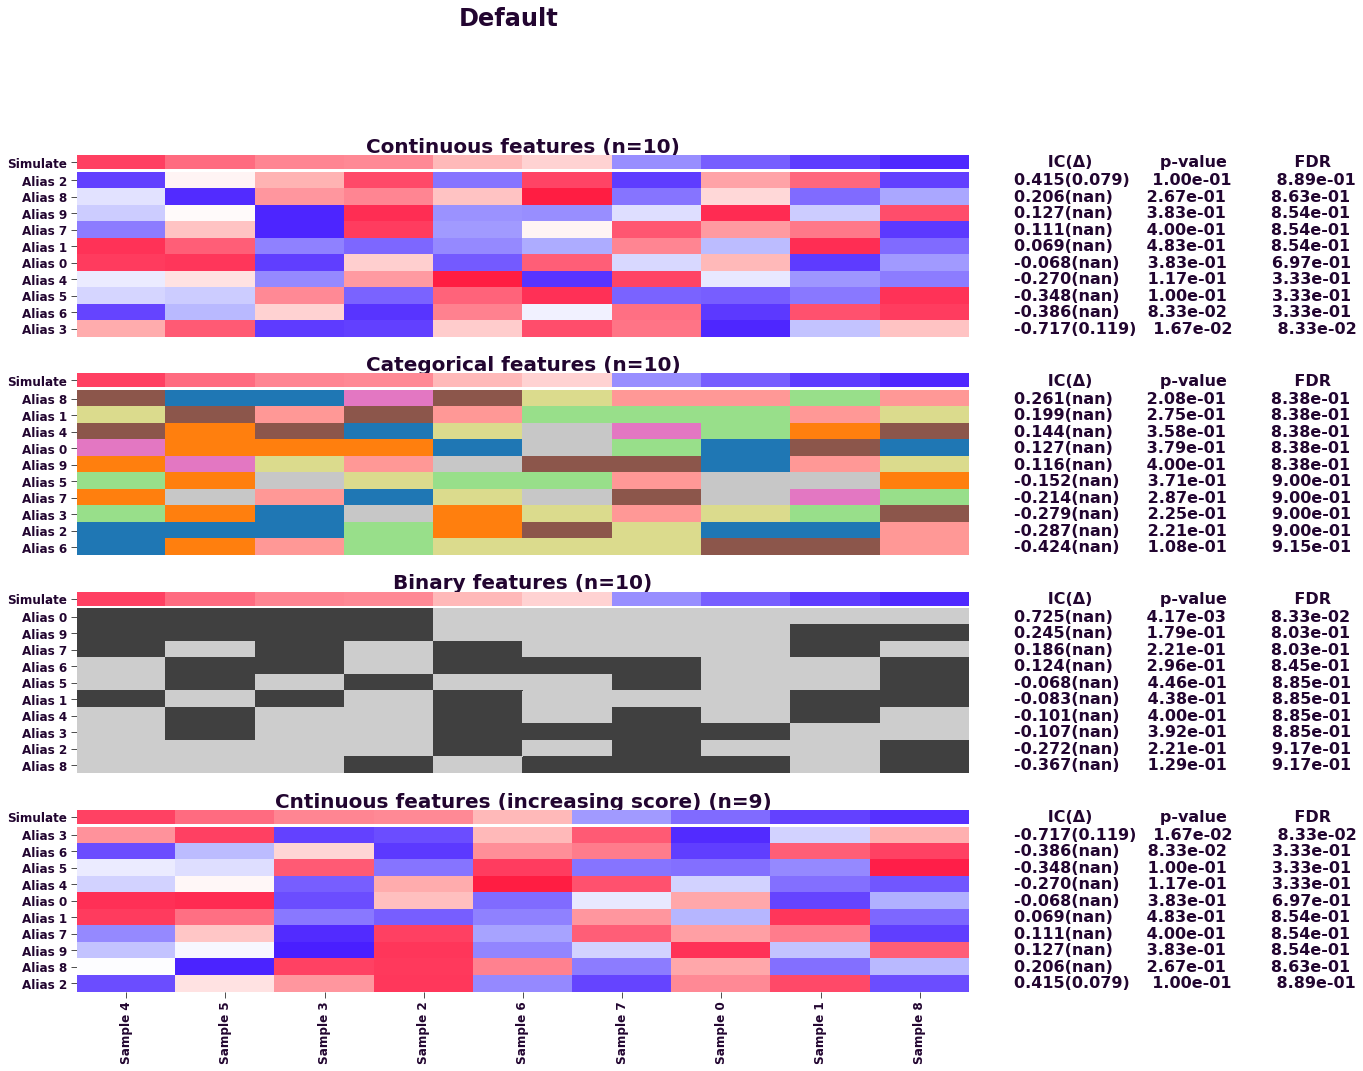

In [19]:
make_summary_match_panel(
    target, features, title='Default', plot_sample_names=True)

Indexs: ['Sample 1', 'Sample 2', 'Sample 3']
Making annotations ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Making annotations ...
Dropping 20 axis-1 slices containing at most 1 unique object(s) ...
Making annotations ...
Making annotations ...


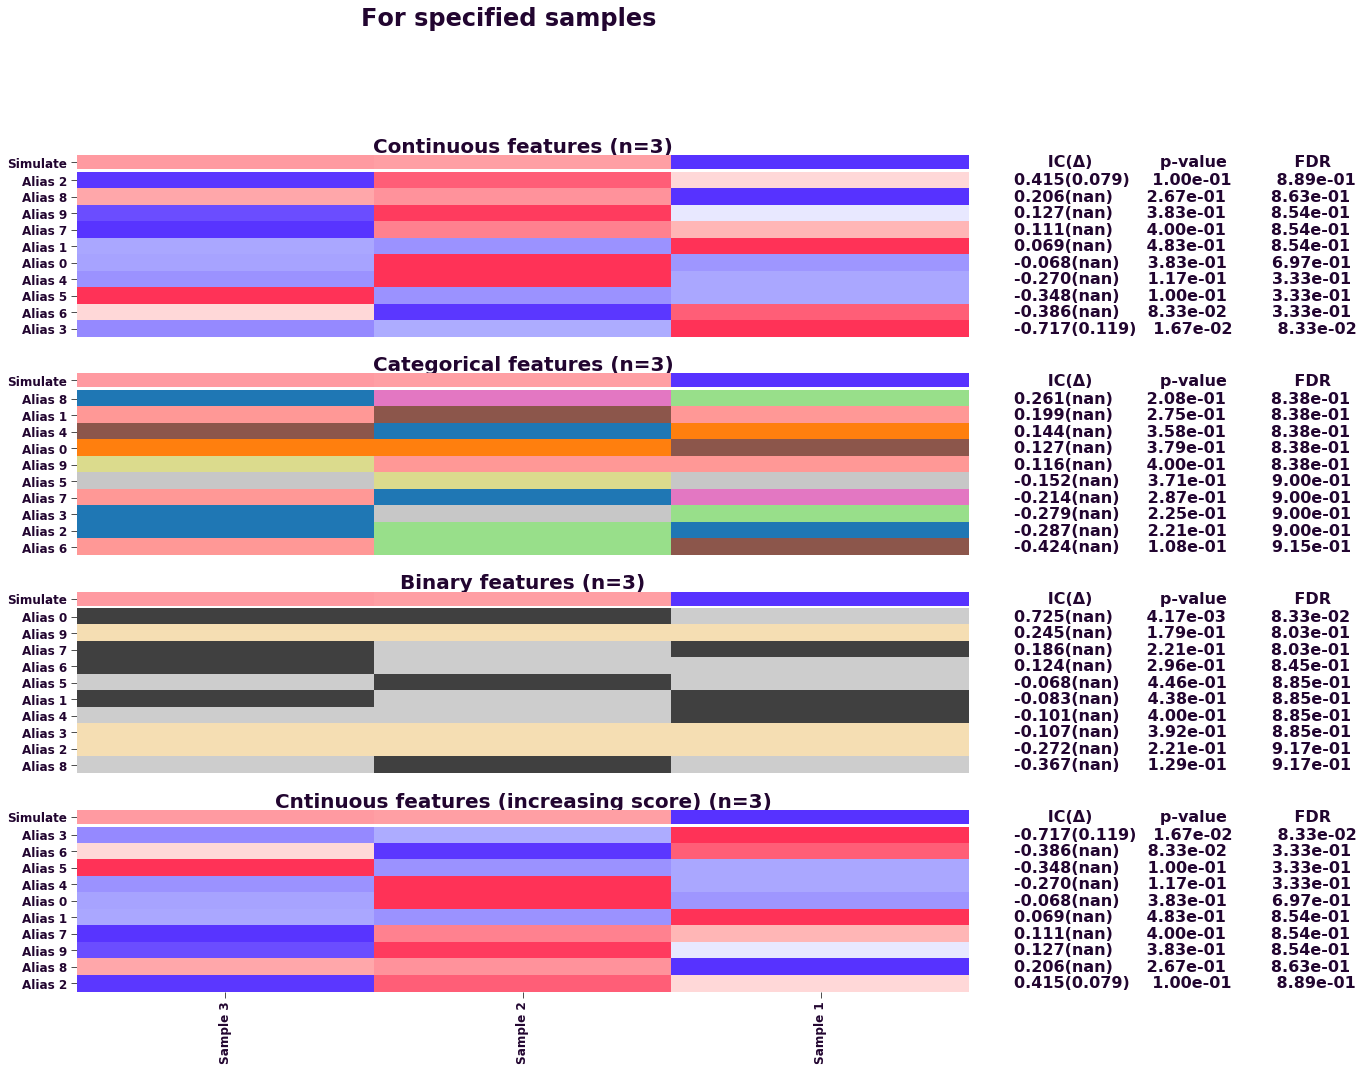

In [20]:
make_summary_match_panel(
    target,
    features,
    indexs=['Sample 1', 'Sample 2', 'Sample 3'],
    plot_sample_names=True,
    title='For specified samples')

Indexs: Index(['Sample 0', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5',
       'Sample 6', 'Sample 7', 'Sample 8'],
      dtype='object')
Making annotations ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Making annotations ...
Making annotations ...
Making annotations ...


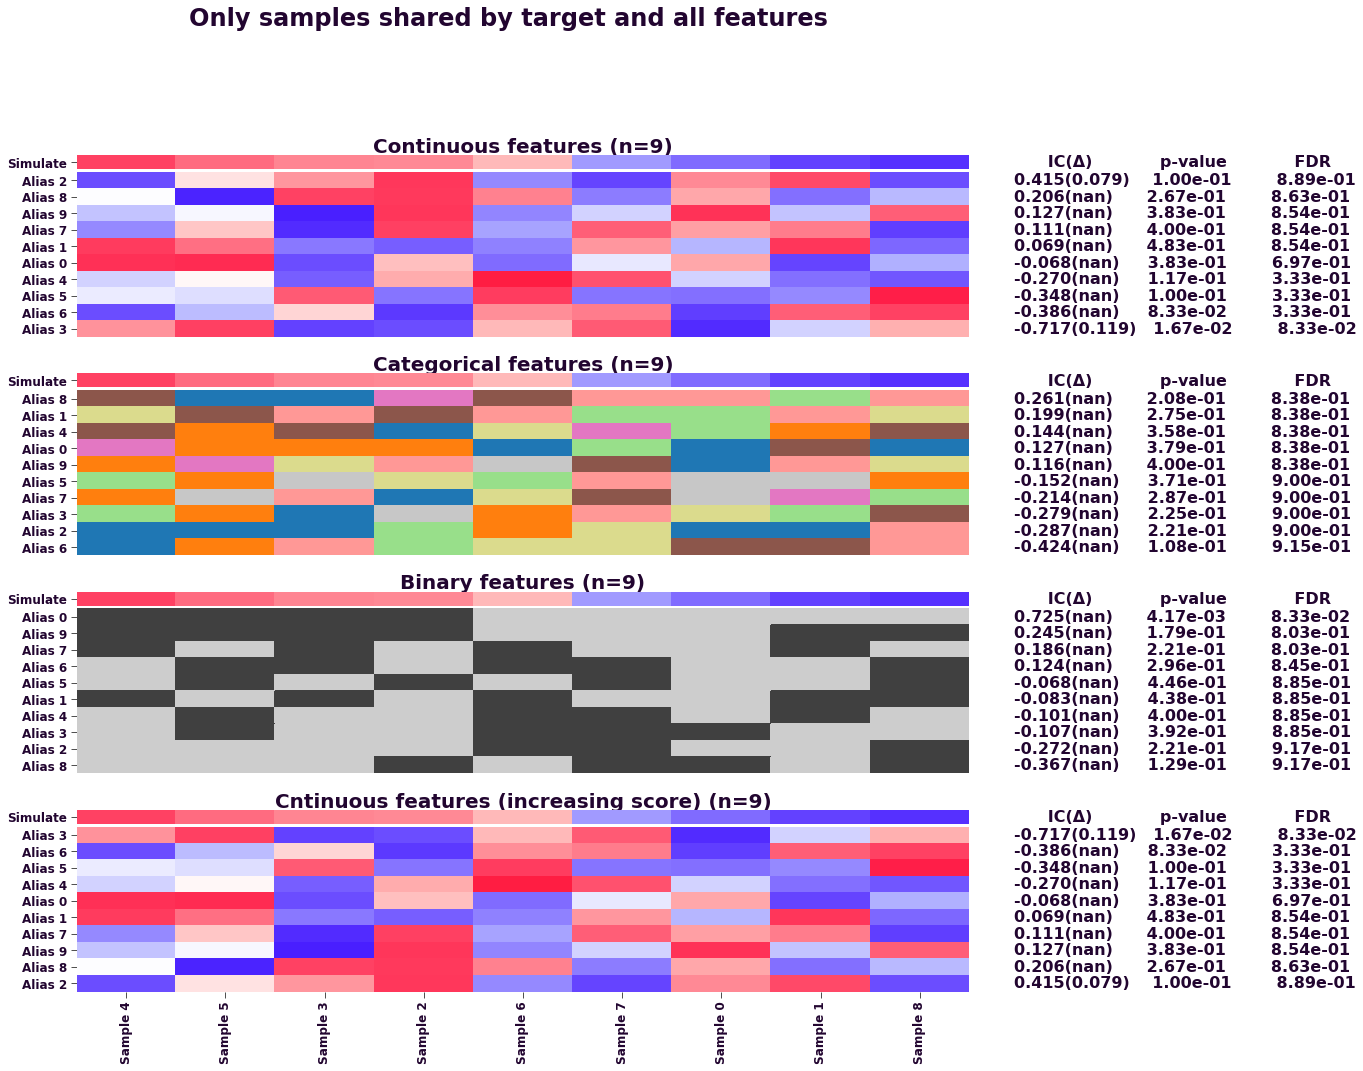

In [21]:
make_summary_match_panel(
    target,
    features,
    indexs='shared_by_target_and_all_features',
    plot_sample_names=True,
    title='Only samples shared by target and all features')